# Chapter 5: Sampling Methods

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')

## Importing the dataset

In [2]:
dataset = pd.read_csv('data/Auto.csv', na_values='?').dropna().reset_index(drop=True)

In [3]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## The Validation Set Approach

### Split the dataset into the train and test set

In [5]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, test_size=0.5, random_state=42)

In [6]:
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

In [7]:
train_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,15.0,8,302.0,130.0,4295,14.9,77,1,mercury cougar brougham
1,24.0,4,140.0,92.0,2865,16.4,82,1,ford fairmont futura
2,32.0,4,71.0,65.0,1836,21.0,74,3,toyota corolla 1200
3,14.0,8,400.0,175.0,4464,11.5,71,1,pontiac catalina brougham
4,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
...,...,...,...,...,...,...,...,...,...
191,15.0,8,304.0,150.0,3892,12.5,72,1,amc matador (sw)
192,18.0,6,232.0,100.0,2789,15.0,73,1,amc gremlin
193,23.8,4,151.0,85.0,2855,17.6,78,1,oldsmobile starfire sx
194,29.9,4,98.0,65.0,2380,20.7,81,1,ford escort 2h


### Fitting simple linear regression model

In [8]:
import statsmodels.api as sm

In [9]:
simple_linear_regression_res = sm.OLS(endog=train_dataset['mpg'], exog=sm.tools.add_constant(train_dataset['horsepower'])).fit()

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
simple_linear_regression_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     353.1
Date:                Sat, 02 Nov 2019   Prob (F-statistic):           1.49e-45
Time:                        22:48:43   Log-Likelihood:                -586.08
No. Observations:                 196   AIC:                             1176.
Df Residuals:                     194   BIC:                             1183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7201      1.024     40.757      0.000      39.701      43.739
horsepower    -0.1710      0.009    -18.792      0.000      -0.189      -0.153
==============================================================================
Omnibus:                       12.078   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.482
Skew:                           0.581   Prob(JB):                      0.00195
Kurtosis:                       3.422   Cond. No.                         333.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Making prediction on validation set
y_pred = simple_linear_regression_res.predict(exog=sm.tools.add_constant(test_dataset['horsepower']))

In [12]:
mse = np.mean((test_dataset['mpg'] - y_pred)**2)
print('Validation set MSE: {}'.format(mse))

Validation set MSE: 25.57387818968441


### Fitting polynomial regression model using OLS.from_formula

In [13]:
polynomial_regression_res = sm.OLS.from_formula('mpg~horsepower+np.power(horsepower, 2)', data=train_dataset).fit()

In [14]:
polynomial_regression_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     277.8
Date:                Sat, 02 Nov 2019   Prob (F-statistic):           1.54e-57
Time:                        22:48:45   Log-Likelihood:                -554.84
No. Observations:                 196   AIC:                             1116.
Df Residuals:                     193   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  61.0662      2.435     25.074      0.000      56.263      65.870
horsepower                 -0.5235      0.042    -12.424      0.000      -0.607      -0.440
np.power(horsepower, 2)     0.0014      0.000      8.512      0.000       0.001       0.002
==============================================================================
Omnibus:                       13.269   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.169
Skew:                           0.363   Prob(JB):                     1.54e-05
Kurtosis:                       4.479   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Making prediction on validation set
y_pred = polynomial_regression_res.predict(exog=test_dataset['horsepower'])

In [16]:
mse = np.mean((test_dataset['mpg'] - y_pred)**2)
print('Validation set MSE: {}'.format(mse))

Validation set MSE: 22.218020050033907


### Fitting polynomial regression model using Sklearn PolynomialFeatures

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [18]:
X_poly_train = poly.fit_transform(train_dataset['horsepower'].values.reshape((-1, 1)))
X_poly_train = pd.DataFrame(X_poly_train, columns=['intercept', 'horsepower', 'horsepower^2'])

In [19]:
X_poly_train.head()

,intercept,horsepower,horsepower^2
0,1.0,130.0,16900.0
1,1.0,92.0,8464.0
2,1.0,65.0,4225.0
3,1.0,175.0,30625.0
4,1.0,160.0,25600.0


In [20]:
polynomial_regression_res_2 = sm.OLS(endog=train_dataset['mpg'], exog=X_poly_train).fit()

In [21]:
polynomial_regression_res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     277.8
Date:                Sat, 02 Nov 2019   Prob (F-statistic):           1.54e-57
Time:                        22:48:48   Log-Likelihood:                -554.84
No. Observations:                 196   AIC:                             1116.
Df Residuals:                     193   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       61.0662      2.435     25.074      0.000      56.263      65.870
horsepower      -0.5235      0.042    -12.424      0.000      -0.607      -0.440
horsepower^2     0.0014      0.000      8.512      0.000       0.001       0.002
==============================================================================
Omnibus:                       13.269   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.169
Skew:                           0.363   Prob(JB):                     1.54e-05
Kurtosis:                       4.479   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_poly_test = poly.transform(test_dataset['horsepower'].values.reshape((-1, 1)))
X_poly_test = pd.DataFrame(X_poly_test, columns=['intercept', 'horsepower', 'horsepower^2'])
y_pred = polynomial_regression_res_2.predict(exog=X_poly_test)

In [23]:
mse = np.mean((test_dataset['mpg'] - y_pred)**2)
print('Validation set MSE: {}'.format(mse))

Validation set MSE: 22.218020050033907


### Validation Set Approach

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
random_states = np.arange(10)
degrees = np.arange(1, 11)
test_size = 0.5

In [26]:
X, Y = np.meshgrid(degrees, random_states, indexing='ij')
Z = np.zeros((degrees.shape[0], random_states.shape[0]))

In [27]:
X, Y, Z

(array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
        [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
        [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
        [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
        [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
        [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]]),
 array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [28]:
regressor = LinearRegression()

In [29]:
for (i, j), v in np.ndenumerate(Z):
    degree = X[i, j]
    random_state = Y[i, j]
    X_poly = PolynomialFeatures(degree=degree).fit_transform(dataset.horsepower.values.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly, dataset.mpg.ravel(), test_size=test_size, random_state=random_state)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    Z[i, j] = mean_squared_error(y_test, y_pred)

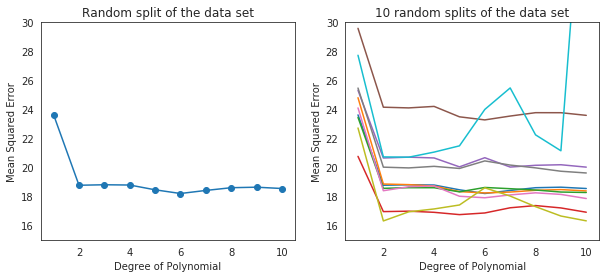

In [30]:
# Visualize test error
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

## Leave-One-Out Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.linear_model import LinearRegression

In [32]:
degrees = np.arange(1, 11)
random_states = np.arange(10)

In [33]:
regressor = LinearRegression()
scores = []
for i in degrees:
    X_poly = PolynomialFeatures(i).fit_transform(dataset.horsepower.values.reshape(-1, 1))
    score = cross_val_score(regressor, X_poly, dataset.mpg, cv=LeaveOneOut(), scoring='neg_mean_squared_error').mean()
    scores.append(score)

## K-Fold Cross-Validation

In [34]:
n_folds = 10
X, Y = np.meshgrid(degrees, random_states, indexing='ij')
Z = np.zeros((degrees.shape[0], random_states.shape[0]))

for (i, j), v in np.ndenumerate(Z):
    degree = X[i, j]
    random_state = Y[i, j]
    X_poly = PolynomialFeatures(degree=degree).fit_transform(dataset.horsepower.values.reshape(-1, 1))
    k_fold = KFold(n_splits=n_folds, random_state=random_state)
    Z[i, j] = cross_val_score(regressor, X_poly, dataset.mpg, cv=k_fold, scoring='neg_mean_squared_error').mean()

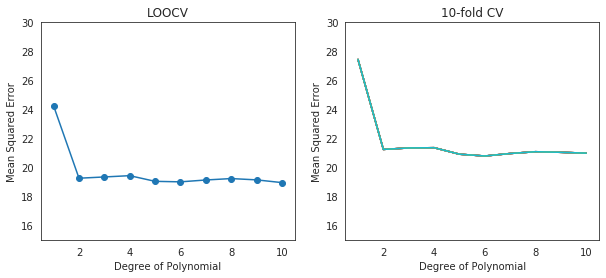

In [35]:
# Visualization of the error
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439

# Left plot
ax1.plot(degrees, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

# Right plot
ax2.plot(X,Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

## Bootstrap method

In [36]:
from sklearn.utils import resample
X = dataset.horsepower.values.reshape(-1, 1)
y = dataset.mpg.values

In [37]:
# Bootstrap estimates for the intercept and slope term
intercept = []
coef = []

regressor = LinearRegression()
for i in range(1000):
    X_resampled, y_resampled = resample(X, y, n_samples=len(X), replace=True)
    regressor.fit(X_resampled, y_resampled)    
    coef.append(regressor.coef_[0])
    intercept.append(regressor.intercept_)

In [38]:
print('Intercept: {}, Standard error: {}'.format(np.mean(intercept), np.std(intercept)))
print('Coefficient: {}, Standard error: {}'.format(np.mean(coef), np.std(coef)))

Intercept: 39.96725723932516, Standard error: 0.8371399623588835
Coefficient: -0.15826960185409938, Standard error: 0.007172149999161111


In [39]:
# Statsmodel OLS estimates for the intercept and slope term
res = sm.OLS(endog=dataset.mpg, exog=sm.tools.add_constant(dataset.horsepower)).fit()

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 02 Nov 2019   Prob (F-statistic):           7.03e-81
Time:                        22:49:03   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The standard errors in each methods are different. Due to the fact that the standard formulas rely on certain assumptions.
- Firstly, they depend on the noise variance. We then estimate that variance using the RSS. Now although the formula for the standard errors do not rely on the linear model being correct, the estimate for the variance does.
- Secondly, the standard formulas assume (somewhat unrealistically) that all the variability comes from the variation.